In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [35]:
server = pd.read_csv("../projects/network_test_20c_a03/logs.txt", delimiter=",")
server["DateTime"] = pd.to_datetime(server["DateTime"])

In [34]:
client = pd.read_csv("../projects/network_test_20c_a03/client_0/time.txt", delimiter=",")
client["DateTime"] = pd.to_datetime(client["DateTime"])

In [73]:
load = []
train = []

round_no = 1
server_r = server[(server["Round"] == 1) & (server["Event"] == "Fit")]

for client_id in range(20):
    client = pd.read_csv(f"../projects/network_test_20c_a03/client_{client_id}/time.txt", delimiter=",")
    client["DateTime"] = pd.to_datetime(client["DateTime"])

    client_r = client[client["Round"] == 1]
    time_df = pd.concat([server_r, client_r])
    time_df["DateTime_next"] = time_df["DateTime"].shift(1)
    time_df["diff"] = (time_df["DateTime"] - time_df["DateTime_next"]).dt.total_seconds().div(60)
    time_df = time_df.dropna()
    try:
        load.append(time_df["diff"][0])
        train.append(time_df["diff"][1])
    except:
        load.append(0)
        train.append(0)


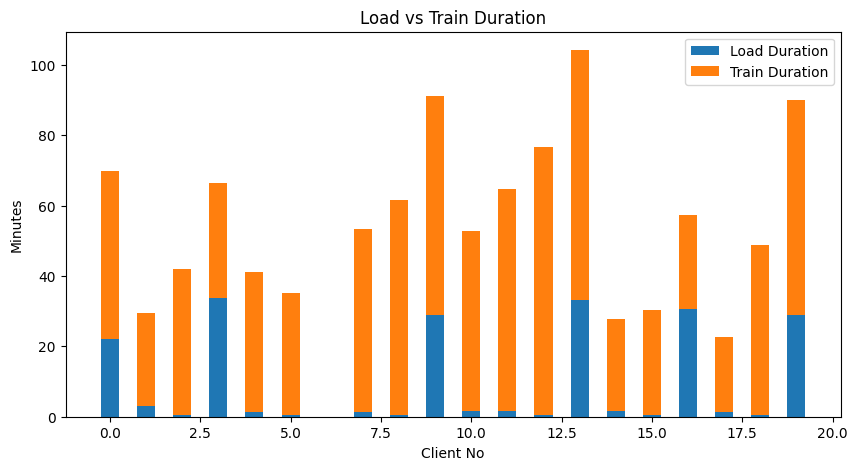

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.5

ax.bar(np.arange(20), load, width, bottom=np.zeros(20), label="Load Duration")
ax.bar(np.arange(20), train, width, bottom=load, label="Train Duration")

ax.set_title("Load vs Train Duration")
ax.set_xlabel("Client No")
ax.set_ylabel("Minutes")
ax.legend(loc="upper right")
plt.show()